### 確率プログラミング

多くなモデルで閉じた形式の解析的な事後分布が求められないために確率プログラミングが必要です。確率プログラミングは複雑なモデルを構築する有効なライブラリがPyMC3です。

事後分布が解析的に解けない場合でも、それを計算するいくつかの方法が存在します。それらの方法のいくつかを示します。

1. 非マルコフ的方法
　 - グリッドコンピューティング　（Grid computing）
  - 2次近似(quadratic approximation)
  - 変分法(variational method)
 
 
2.  マルコフ的方法
   - メトロポリスーヘイステイングス
   - ハミルトニアンモデカルロ/ノーUターンサンプラー
   


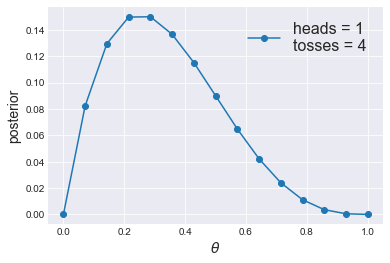

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
plt.style.use('seaborn-darkgrid')

def posterior_grid(grid_points=100, heads=6, tosses=9):
    """
    A grid implemetation for the g coin-flip problem
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(5, grid_points)    
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid, posterior

points = 15
h, n = 1, 4
grid, posterior = posterior_grid(points, h, n)

plt.plot(grid, posterior, 'o-', label='heads = {} \ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('posterior', fontsize=14)
plt.legend(loc=0, fontsize=16)

#### 非マルコフ的方法

- 2次近似
ラブラス法(Laplace method)や正規近似としても知られ、正規分布によって事後分布を近似することを指します。事後分布の最頻値の周辺をを正規分布として近似することです。

- 変分法
大きなデータセットの場合、マルコフ的な方法は遅く、必要な速度を実現できない場合があるます。あまりに計算が困難な尤度に関して、変分法はより良い選択となり得ます。加えて、これらの方法は、MCMCの初期値として事後分布の高速な近似を与えるために有益です。変分法の一般的なアイデアは、単純な分布を使って事後分布を近似することにあります。

#### マルコフ的方法
MCMC法として知られる一連の方法が存在します。グリッドコンピューティングの項で見たように、与えられた点に関して尤度と事前分布を計算する必要があります。これによって事後分布の全体を近似したいのです。MCMC法はグリッドコンピューティングより優れた結果をもたらします。というのも、それらは低い確率の領域より高い確率の領域に多くの時間留まるように設計されているからです。実際、あるMCMC法はパラメータの相対的な確率に応じてパラメータ空間の異なる領域を探索してくれます。領域Aが領域Bの2倍の確率であるなら、Bからのサンプルの2倍のサンプルをAから抽出します。従って、解析的に全ての事後分布を計算することが不可能な場合でもl私達はMCMC法を使うことでそこからサンプリングすることができ、サンプルサイズが大きくなればより良い結果を得ることができます。

- MCMC(MonteCarlo MarkovChain)
モンテカルロの由来は乱数を使用するためです。関心のある数量を計算するためにモンテカルロ法を使うという古典的な教示例は、円周率$\pi$の計算です。
